TestStrategy __init   &&&&&
Bias __init__
good day
>>>>>>>>>>
当前可用资金 9000.0
当前总资产 10000.0
当前持仓量 100
当前持仓成本 10.0
<<<<<<<<<<<<<

---show start-------->
总资金: 109000.0


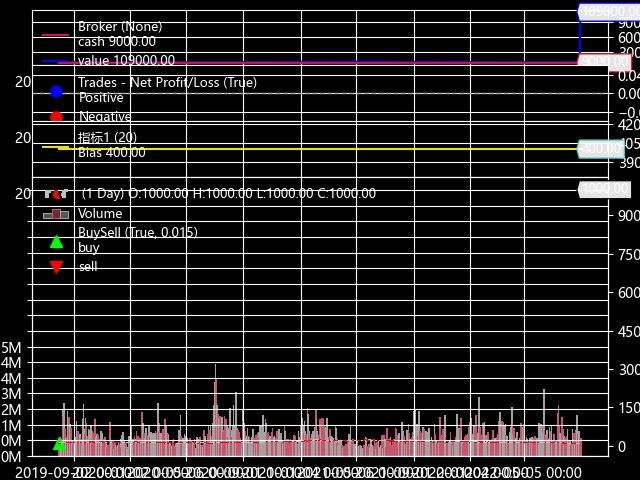

[[<Figure size 640x480 with 5 Axes>]]

In [4]:
%reload_ext autoreload
%autoreload 2

from __future__ import (absolute_import, division, print_function, unicode_literals)
import backtrader as bt
import pandas as pd
from datetime import datetime
from colorama import Fore, Back, Style
import sys
import os
from pprint import pprint
from IPython.display import clear_output
import IPython
from IPython.display import display_html
from btplotting import BacktraderPlottingLive
from btplotting import BacktraderPlotting
import matplotlib 
matplotlib.rc("font", family='Microsoft YaHei')# 增加


sys.path.append("..")
from strategy.TestStrategy import TestStrategy
 

from tools.debuger import *

# debug(sys)

cerebro = bt.Cerebro()

cerebro.addstrategy(TestStrategy )

#获取数据
currentPath =os.path.dirname (os.path.realpath("__file__" ))
## get parent path from current path
parentPath = os.path.dirname(currentPath)
csv_name = 'sz000001.csv'
stock_hfq_df = pd.read_csv(os.path.join( parentPath, 'data/', csv_name), index_col='date', parse_dates=True)
start_date = datetime(2019, 8, 1)  # 回测开始时间
end_date = datetime(2022, 8, 30)  # 回测结束时间
data = bt.feeds.PandasData(dataname=stock_hfq_df, fromdate=start_date, todate=end_date)  # 加载数据
cerebro.adddata(data)  # 将数据传入回测系统


startcash=10000
cerebro.broker.setcash( startcash )
# cerebro.addanalyzer(BacktraderPlottingLive)
cerebro.run()
print("---show start-------->")
# print("--show end--------->")
# cerebro.plot(p , iplot=False)
%matplotlib widget 

portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(f'总资金: {round(portvalue,2)}')
cerebro.plot( style='bar',iplot=False)



